# Milestone1

# 1. Introduction
The goal of this software is to perform automatic differentiation (AD), a technique crucial to many fields in modern science. Automatic differentiation forgoes symbolic differentiation (too dense with complex equations) and numerical differentiation (prone to round-off errors in discretization process and cancellation, truncation error in estimating the derivative) by taking an exact x for which to iteratively update the actual value and gradient. This allows machine level precision in complex, nonlinear systems of equations that are impossible to find analytically. 

For instance, in neural networks, AD allows us to find the optimal combination of millions of parameters via gradient-based optimization.


# 2. Background


## 2.1 The Chain Rule
$y = f(g(h(x)))$
From inside to out side: 
$$w1 = h(x)$$
$$w2 = g(w1)$$
$$y = f(w2)$$
The derivative with respect to x: 
$$\frac{dy}{dx} = \frac{dy}{dw_{2}} \frac{dw_{2}}{dw_{1}} \frac{dw_{1}}{dx}$$ 

## 2.2 Computational Graph
Except input nodes, each node v will represent an intermediate result of the computation. The intermediate results can then be assembled using the chain rule to get the final derivative we’re looking for.

Below is the computational graph of $$ y = f(x_{1}, x_{2}) = \ln(x_{1}) + x_{1}x_{2} - \sin(x_{2})$$

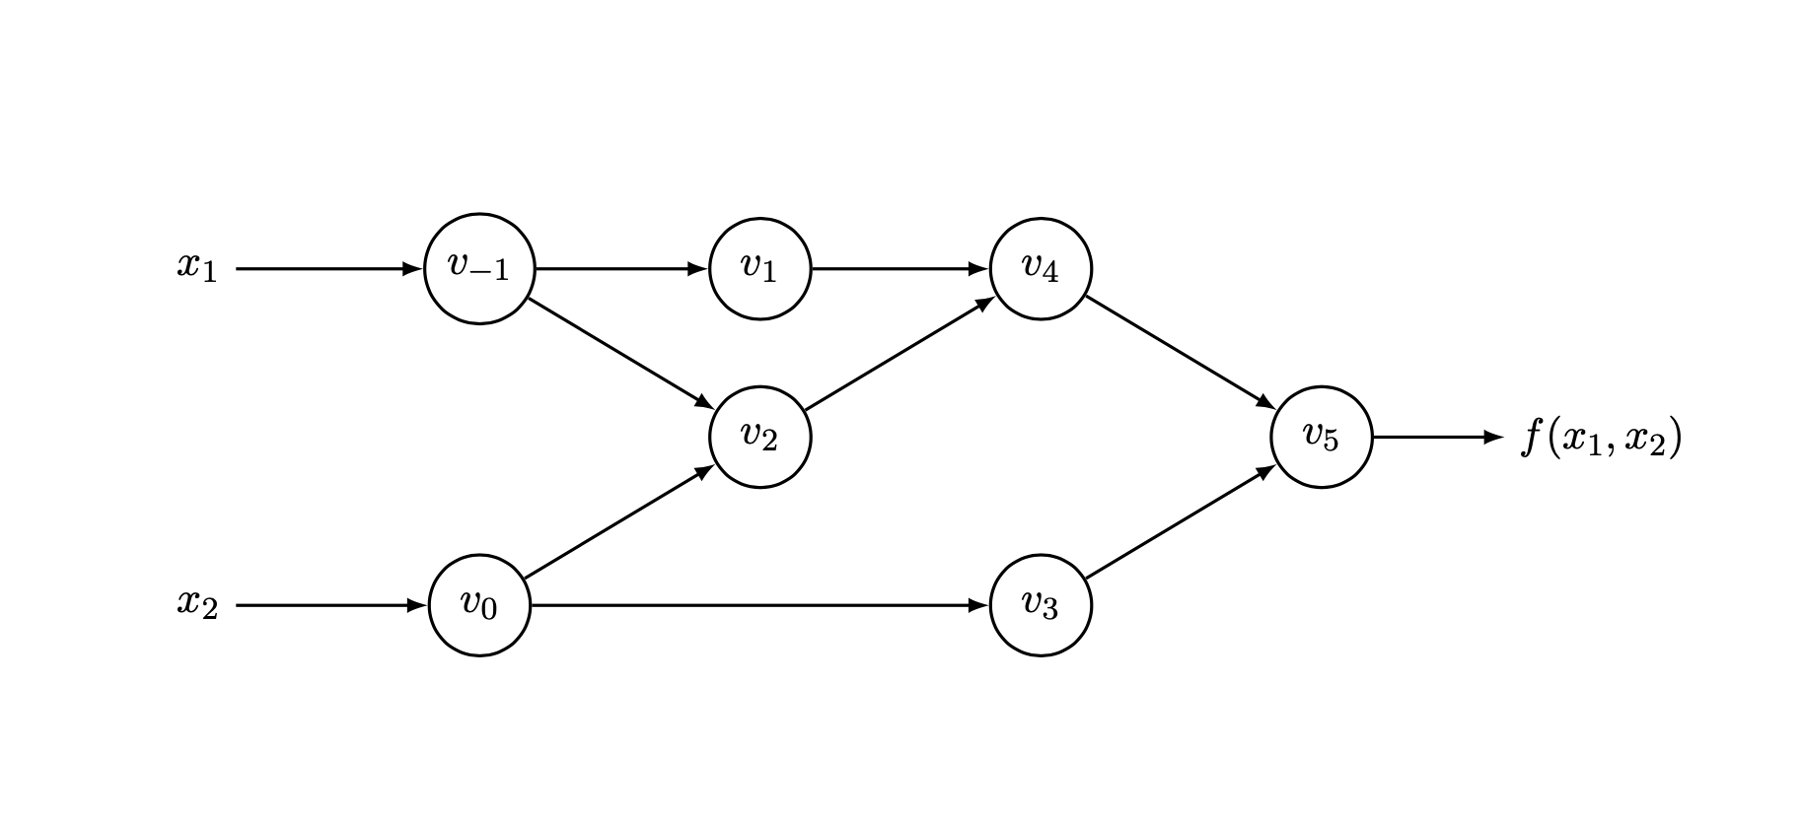










### 2.2.1 Forward Mode AD
In forward AD, we simply apply the chain rule to each basic operation in a forward primal trace and obtain a forward derivative trace.

Below is the forward mode AD correspondent to the computational graph above. 



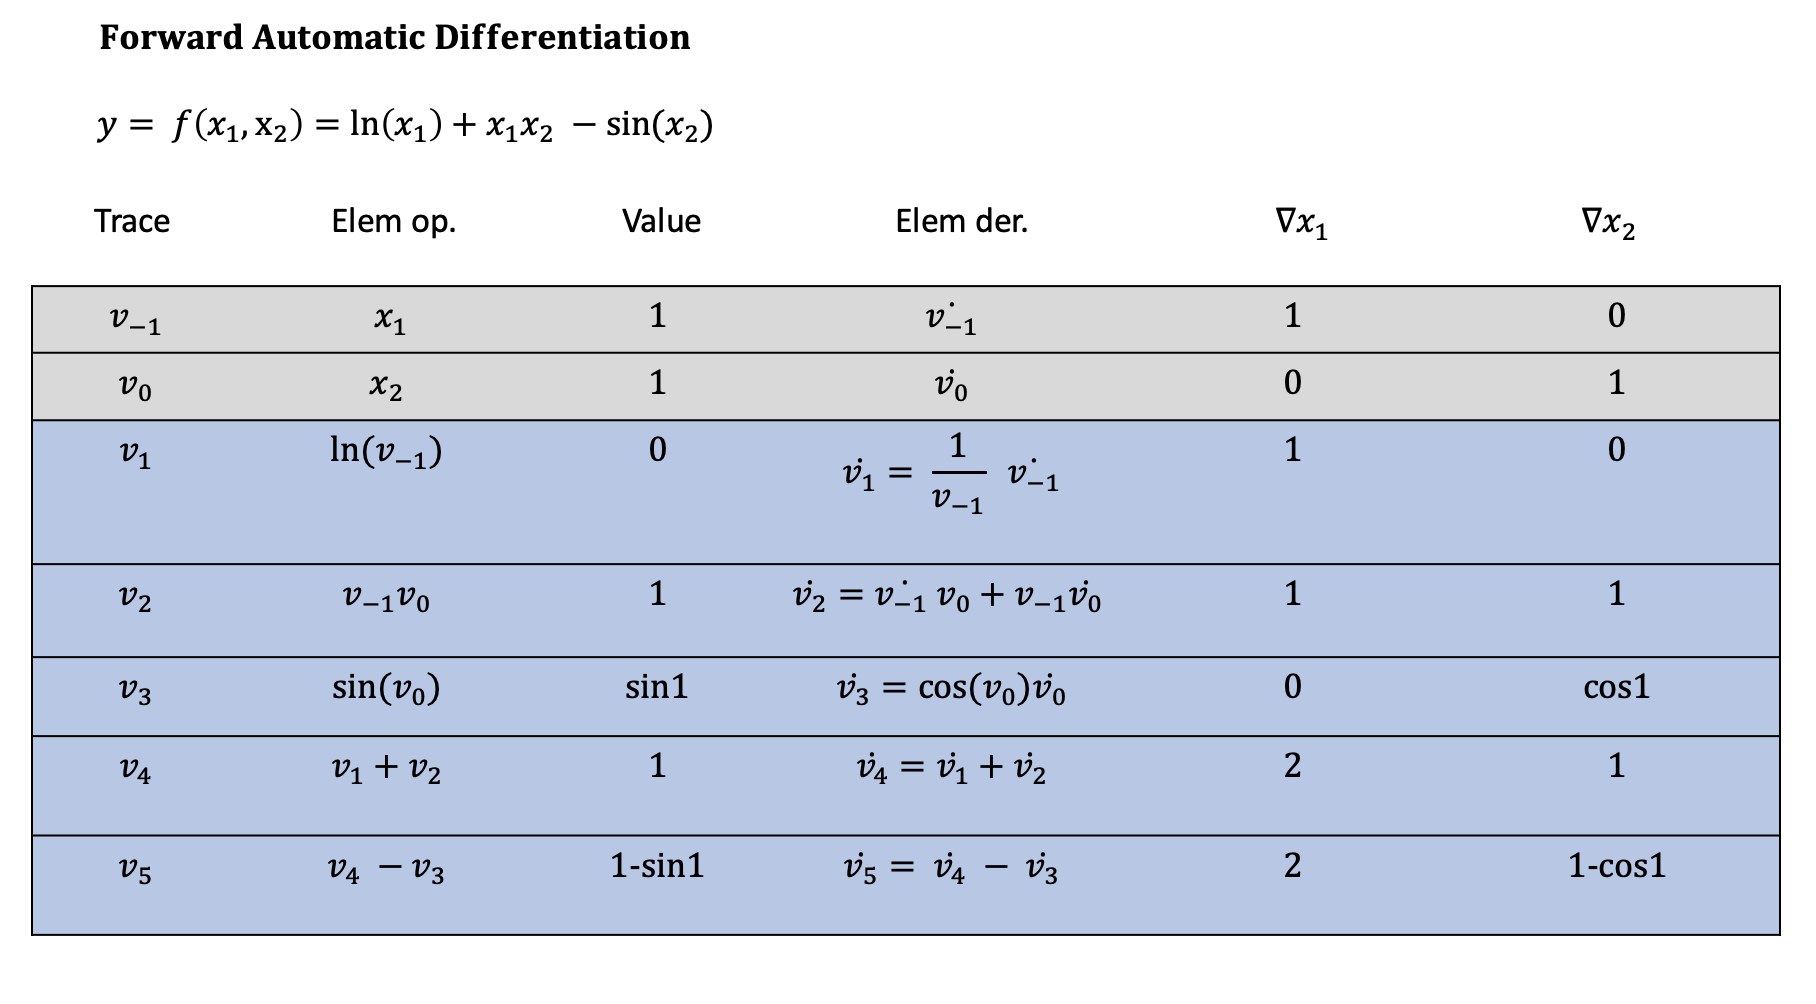



### 2.2.2 Reverse Mode AD
In reverse AD, there are two separate phases. During a forward phase, all intermediate variables are evaluated and their values stored in memory. In a following backward phase, we then propagates back the derivatives/adjoints with the help of the chain rule. Reverse mode AD is what we commonly refer to as backpropagation (Rumelhart et al., 1988) in Deep Learning.

Below is the reverse mode AD correspondent to the computational graph above. 





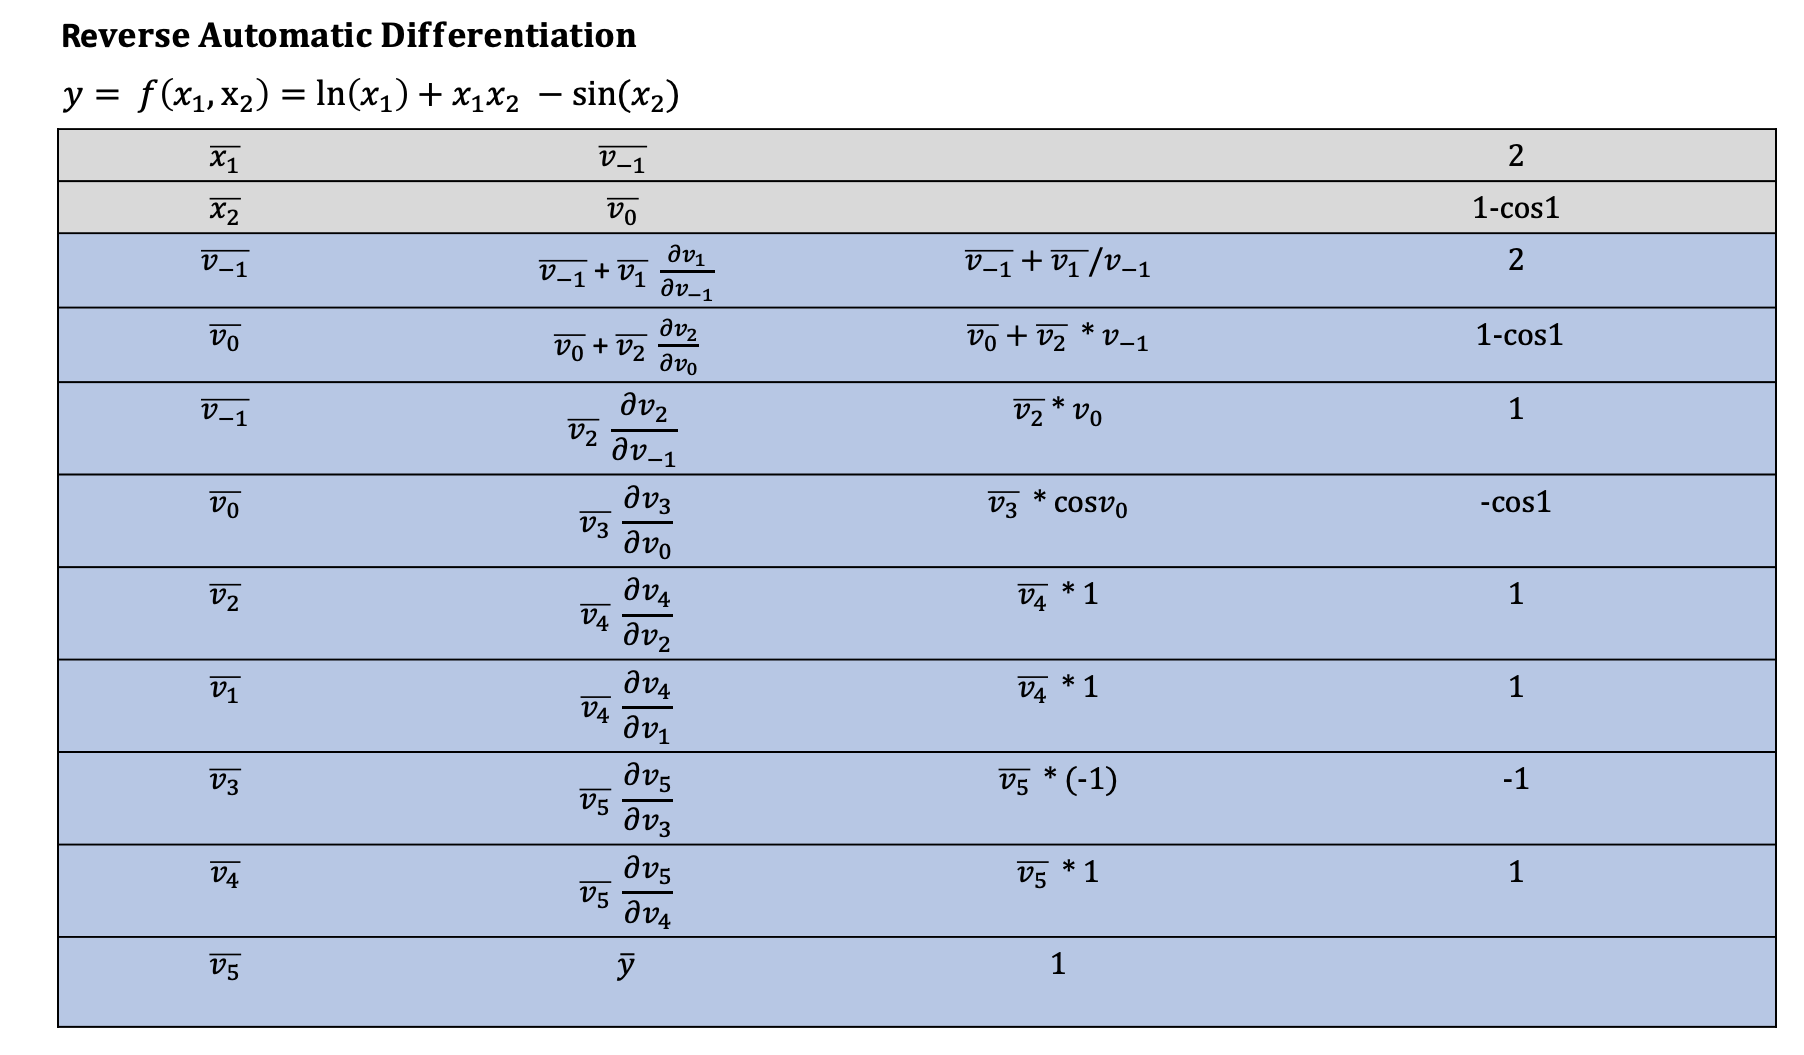

## 2.3 Elementary Functions


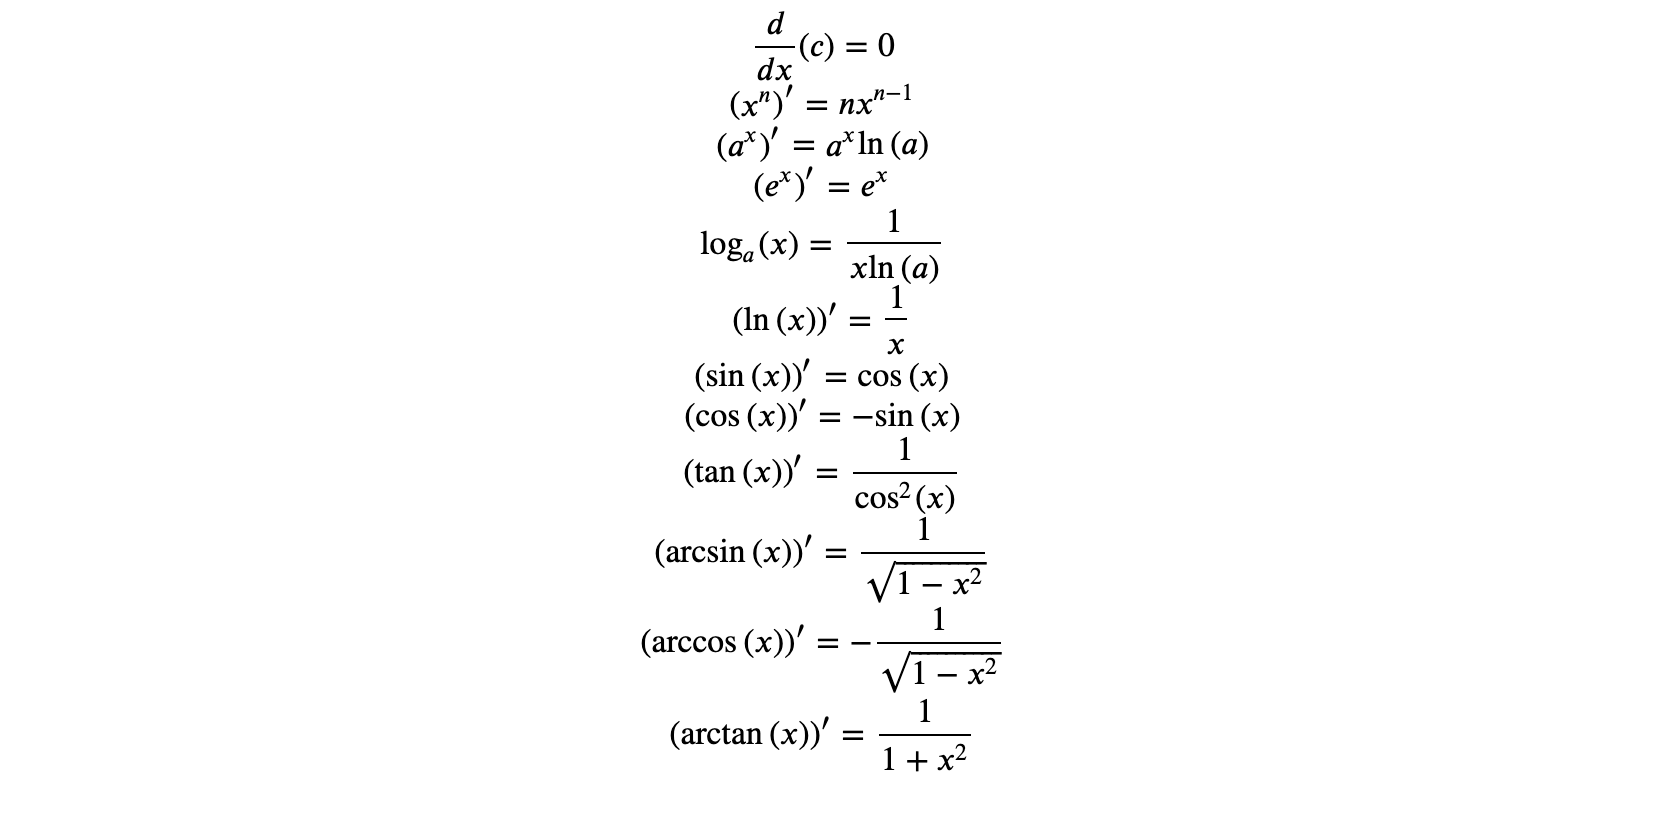



## 2.4 AD with Dual Number

Definition of dual number: z = a + b$\epsilon$,where a,b is real number, $\epsilon^2 = 0$ and $\epsilon \neq 0$

It can be shown that dual numbers can be used as a data structure in forward mode automatic differentiation:

-Adding dual numbers together resembles the linearity of addition and results in adding the functions in the real part and adding the derivatives in the dual part.

-Multiplication results in multiplication of the functions in the real part and the correct product rule for the derivatives in the dual part.


In forward mode AD, we can use dual numbers to carry $v_{j}$ and $D_{p}v_{j}$ forward simultaneously as a pair, where the real part corresponds to the primal trace and the dual part corresponds to the derivative trace.

For example, 

$$z_{1} = v_{1} + D_{p}v_{1}\epsilon$$

$$z_{2} = f(z_{1}) = \sin{(z_{1})}$$

$$z_{2} = \sin{(z_{1})} = \sin{(v_{1})} + \cos{(v_{1})}D_{p}v_{1}\epsilon = v_{2} + D_{p}v_{2}$$


## 2.5 References
Baydin A G, Pearlmutter B A, Radul A A, et al. Automatic differentiation in machine learning: a survey[J]. Journal of machine learning research, 2018, 18.

# 3. How to use AutomaticDifferentiation

## 3.1 Install Package
  
### STEP 1 ) Create  Enviroment 
It is important to create a virtual environment when install different packages since it will prevent conflict with other projects or the operating system's packages.

We will be using pythons **venv** module to create the virtual environment. If you do not have python set up in your computer please follow the following guidelines here: [https://realpython.com/installing-python/](https://realpython.com/installing-python/)

Now please run the following lines in your terminal to create your virtual environment:

**Windows User**

```
$mkdir autodiff
$cd autodiff
$py -3 -m venv venv

```

**Linux**

```
$mkdir autodiff
$cd autodiff
$python3 -m venv venv
```

### STEP 2 ) Activate Enviornment 
We will now activate the virtual environment we just created:

**Windows User**

```
$venv\Scripts\activate
```

**Linux**

```
$ . venv/Scripts/activate
```

### STEP 3 ) Install Package from Git
We can install and update our package with the following terminal commands:

###### Option A:
**Windows User**

```
pip install git+https://github.com/cs107-sandbox/cs107-FinalProject
```

**Linux**

```
pip install git+https://github.com/cs107-sandbox/cs107-FinalProject
```

###### Option B:
We can also installed the required files from our GitHub running the following commands: 

**Windows User**

```
git clone https://github.com/cs107-sandbox/cs107-FinalProject.git
```

**Linux**

```
git clone https://github.com/cs107-sandbox/cs107-FinalProject.git
```

Remember to install all the needed dependencies in the requirement.txt file:

```
pip install -r requirements.txt
```

## 3.2 Interacting with AutomaticDifferentiation

Users will create node class objects to perform forward-mode automatic differentiation. Node objects have a value, gradient, and a list of children associated with it, and can be used to hand-build computational graphs. 
As an example, finding the gradient of a simple function 2x + 3 will look like:


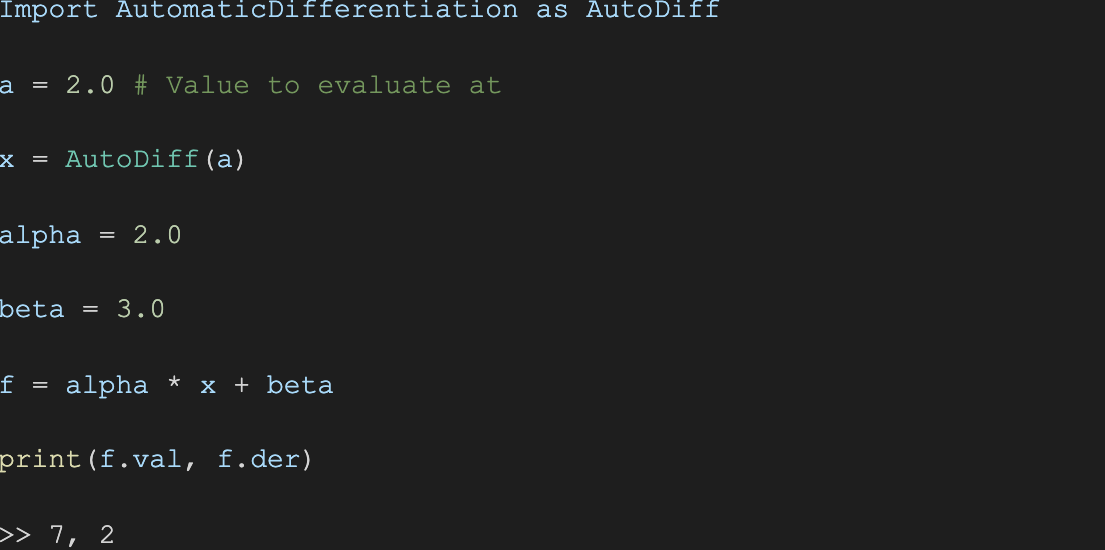




# 4. Software Organization

For the structure, we will have an empty \__init\__.py file for package-level initialization, pyproject.toml, README.md, LICENSE, setup.cfg (with metadata about the package and authors) in the root folder. Then, inside src/, we will have our main module, AutomaticDifferentiation.py. We may add other modules to the directory as we continue to integrate and work on the project, e.g., reverse mode differentiation. There seems to be little need for nested structures for now, as the functionalities of our package are simple. 

In a separate test/ directory, we will have our test files that test our code with different functions. We will also attempt to implement TravisCI and Codecov for AutomaticDifferentiation. Since TravisCI is able to upload coverage reports to Codecov, we will be able to check the program's total success. 
We will use binary distribution, as pip, a installation method most familiar to end users, prefers binary distribution. We follow the following steps: 

1. adding a pyproject.toml file
2. installing build
3. building our package with python -m build at the root directory
4. upload to PyPI test (test.pypi.org) first, then to PyPI. 

Although we are in the earlier stages of our project, it would be ideal to create a github package website that gives users information about our package and examples.



# 5. Implementation


Core data structure: graph, list, dictionary

We will implement all the basic functions of auto differentiation in a single class Node

The Node class corresponds to a node in a computation graph.
- Attributes:
1.      self.value: value at each node
2.      self.grad: initial gradient for each node
3.      self.children: A list of children that lead to this node
4.      self.id: unique id for each node (for debugging purpose)

- Method:
1.      \__init\__(self, value, grad)
Initialize a node with specified value and gradient
2.      \__add\__(self, other)
Dunder method: customize addition between two instances of Node
3. \__mul\__(self, other)
Dunder method: customize multiplication between two instances of Node
4.      \__sub\__(self, other)
Dunder method: customize subtraction between two instances of Node
5.      \__truediv\__(self, other)
Dunder method: customize division between two instances of Node
6.      sin(self)
overwrite Math.sin method
7.      exp(self)
overwrite Math.exp method
8.      log(self)
overwrite Math.log method

Dependencies:

External: Numpy 
In particular, we will use np.vectorize() to vectorize operations in high dimension settings.

While Numpy is the only external dependency, we may use native python libraries, namely:
1. cmath: Mathematical functions for complex numbers.
2. decimal: Implementation of the General Decimal Arithmetic Specification
3. doctest: Test pieces of code within docstrings
4. fractions: Rational numbers
5. functools: Higher-order functions and operations on callable objects.
6. math: Mathematical functions
7. numbers: Numeric abstract base classes (Complex, Real, Integral, etc.)
8. test: Regression tests package containing the testing suite for Python

# 6. Licensing

We plan to adopt the MIT License for its simplicity. AD already has several established packages, and our program is unlikely to be monetized, and we want users to freely take and expand our simple package if they wish to. The MIT License is well known, popular, and compatible with the BSD license that our only external package, Numpy, uses. We do not plan to modify or redistribute Numpy but rather only import it, and so will not need to retain the original copyright notice. 


# 7. Feedback

## 7.1 Introduction  

Comments: 

It would be better if you illustrate more about the advantages of automatic differentiation over other differencing methods like finite-difference. 


Response:

The goal of this software is to perform automatic differentiation (AD), a technique crucial to many fields in modern science. Automatic differentiation forgoes symbolic differentiation (too dense with complex equations) and numerical differentiation (prone to round-off errors in discretization process and cancellation, truncation error in estimating the derivative) by taking an exact x for which to iteratively update the actual value and gradient. This allows machine level precision in complex, nonlinear systems of equations that are impossible to find analytically.

For instance, in neural networks, AD allows us to find the optimal combination of millions of parameters via gradient-based optimization.


## 7.2 How to Use 

Comments: You may want to talk about how to install you package as well. 

Response:

Before installing the AutomaticDifferentiation Package you must first install the following packages:
* Numpy: [https://numpy.org/install/](https://numpy.org/install/)

Now to install the AutomaticDifferentiation Package we must run the following line in terminal:

-- pip install AutomaticDifferentiation


## 7.3 Software Organization

Comments: You may want to include a graph to better illustrate your directory structure. 

Response:

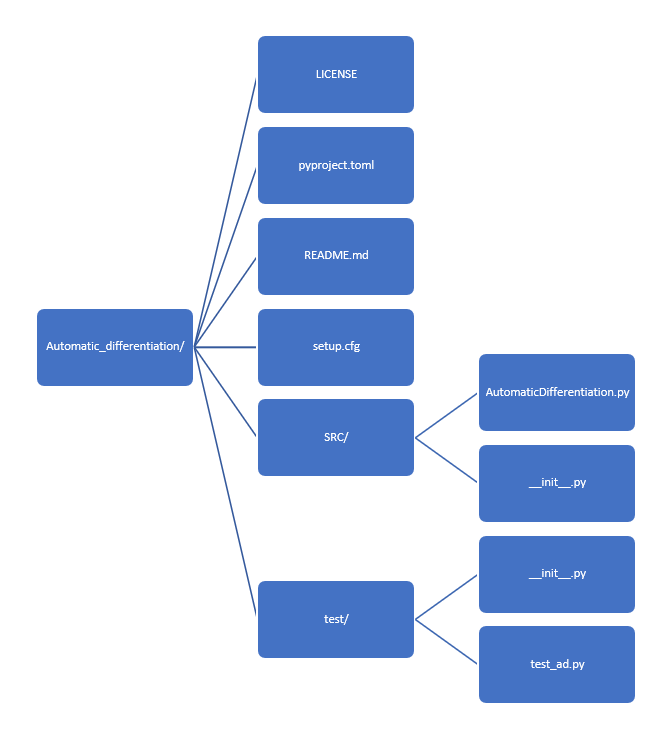



## 7.4 Implementations

Comments: You may want to illustrate more about how you deal with vector functions of vectors and scalar function of vectors. 


Response:

class Vector_Function():

attributes:

- self.functions: an array of target functions of input
- self.variables: an array of node class used in each function

methods:

- cal(self): calculate the derivative and the value of each function in each functions
- get_deri(self): get the derivative of each function with respect to each variable
- get_val(self): return the val of each function in an array

#define function

x = Node(1)

y = Node(1)

z = Node(1)

f= Vector_Function( [x+1 , x+z+y] )

#derivative

f.get_der()

[[1,0,0], [1,1,1]]

#value

f.get_value()

[2, 3]

